In [98]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

EDA

In [99]:
ap_dataset=pd.read_csv('https://raw.githubusercontent.com/Aadityach/L5CG1_Aaditya_2414024/main/global_air_pollution.csv')
ap_dataset.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [100]:
ap_dataset.info()  # Data types, non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [101]:

# Summary statistics
ap_dataset.describe()  # Mean, std, min, max, etc.



,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [102]:
# Checking for missing values
ap_dataset.isnull().sum()  # Sum of missing values per column



Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

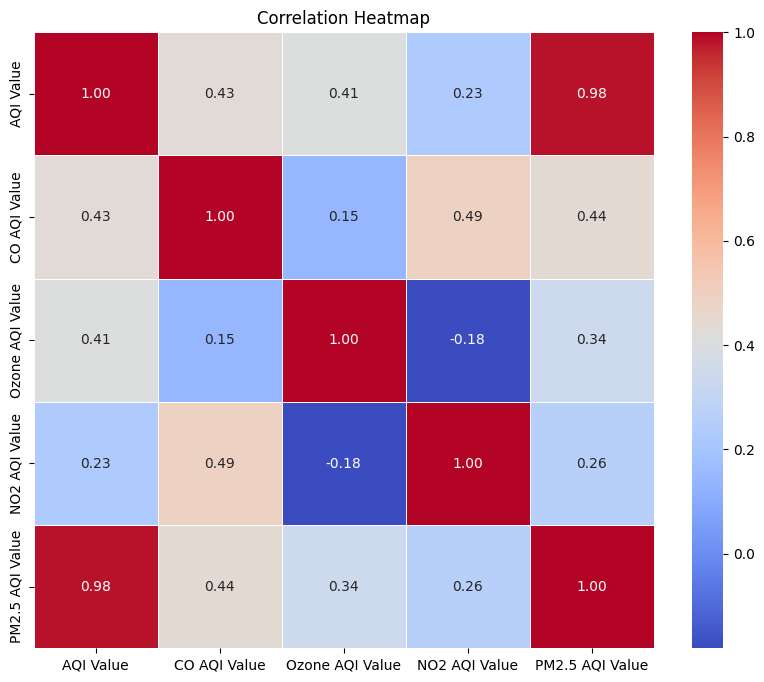

In [103]:
# Select only numeric columns for correlation calculation
numeric_columns = ap_dataset.select_dtypes(include=['number']).columns

# Calculate the correlation matrix only for numeric columns
correlation_matrix = ap_dataset[numeric_columns].corr()

# Heatmap for the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


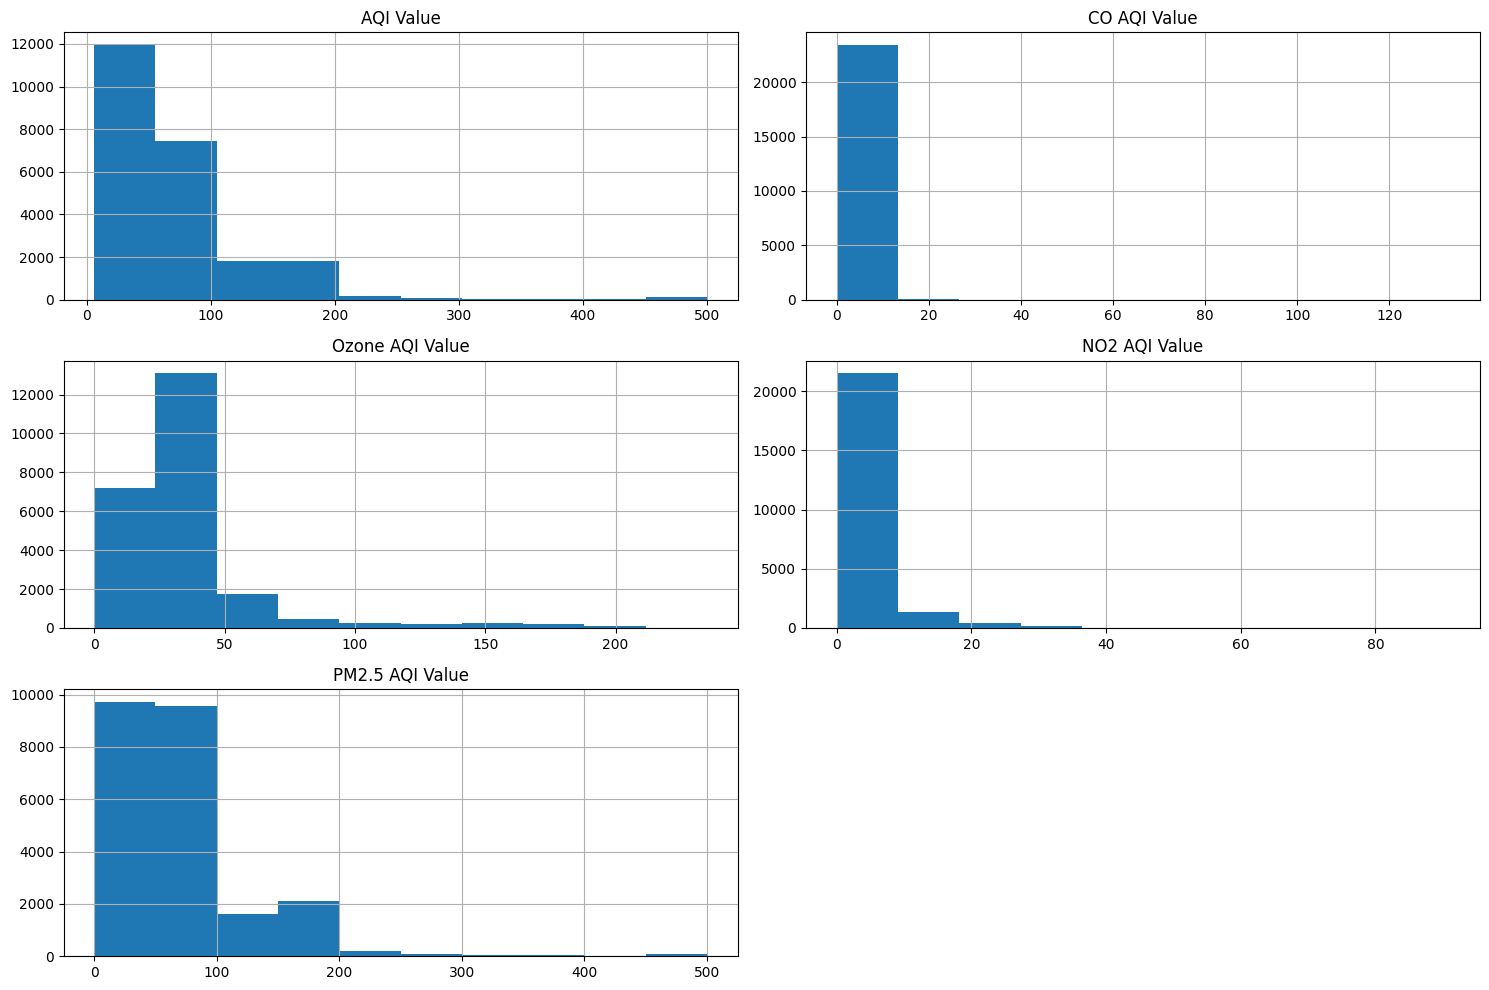

In [104]:
# Visualization
# Distribution of numeric columns (histograms)
ap_dataset.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()



In [105]:
# Define features and target
features = ['CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']
target = 'AQI Value'

# Define X and y
X = ap_dataset[features]
y = ap_dataset[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#

In [106]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / X.shape[0]) * np.dot(X.T, (y_pred - y))
            db = (1 / X.shape[0]) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r_squared = r2_score(y, y_pred)
        return mse, mae, r_squared

# Create and train the model
model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
train_mse, train_mae, train_r_squared = model.evaluate(X_train_scaled, y_train)
test_mse, test_mae, test_r_squared = model.evaluate(X_test_scaled, y_test)

print("\nTrain Metrics:")
print(f"Mean Squared Error: {train_mse:.4f}")
print(f"Mean Absolute Error: {train_mae:.4f}")
print(f"R-Squared: {train_r_squared:.4f}")

print("\nTest Metrics:")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"Mean Absolute Error: {test_mae:.4f}")
print(f"R-Squared: {test_r_squared:.4f}")



Train Metrics:
Mean Squared Error: 80.7265
Mean Absolute Error: 4.8240
R-Squared: 0.9742

Test Metrics:
Mean Squared Error: 76.9260
Mean Absolute Error: 4.7606
R-Squared: 0.9759


In [107]:
from sklearn.linear_model import LinearRegression

# Create and train the model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_sklearn = sklearn_model.predict(X_train_scaled)
y_test_pred_sklearn = sklearn_model.predict(X_test_scaled)

# Evaluate the model
train_mse_sklearn = mean_squared_error(y_train, y_train_pred_sklearn)
train_mae_sklearn = mean_absolute_error(y_train, y_train_pred_sklearn)
train_r_squared_sklearn = r2_score(y_train, y_train_pred_sklearn)

test_mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)
test_mae_sklearn = mean_absolute_error(y_test, y_test_pred_sklearn)
test_r_squared_sklearn = r2_score(y_test, y_test_pred_sklearn)

print("\nTrain Metrics (sklearn):")
print(f"Mean Squared Error: {train_mse_sklearn:.4f}")
print(f"Mean Absolute Error: {train_mae_sklearn:.4f}")
print(f"R-Squared: {train_r_squared_sklearn:.4f}")

print("\nTest Metrics (sklearn):")
print(f"Mean Squared Error: {test_mse_sklearn:.4f}")
print(f"Mean Absolute Error: {test_mae_sklearn:.4f}")
print(f"R-Squared: {test_r_squared_sklearn:.4f}")


Train Metrics (sklearn):
Mean Squared Error: 80.6993
Mean Absolute Error: 4.8432
R-Squared: 0.9742

Test Metrics (sklearn):
Mean Squared Error: 76.9413
Mean Absolute Error: 4.7763
R-Squared: 0.9759


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNN regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
train_mse_knn = mean_squared_error(y_train, y_train_pred_knn)
train_mae_knn = mean_absolute_error(y_train, y_train_pred_knn)
train_r_squared_knn = r2_score(y_train, y_train_pred_knn)

test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
test_r_squared_knn = r2_score(y_test, y_test_pred_knn)

print("\nTrain Metrics (KNN):")
print(f"Mean Squared Error: {train_mse_knn:.4f}")
print(f"Mean Absolute Error: {train_mae_knn:.4f}")
print(f"R-Squared: {train_r_squared_knn:.4f}")

print("\nTest Metrics (KNN):")
print(f"Mean Squared Error: {test_mse_knn:.4f}")
print(f"Mean Absolute Error: {test_mae_knn:.4f}")
print(f"R-Squared: {test_r_squared_knn:.4f}")


Train Metrics (KNN):
Mean Squared Error: 15.4685
Mean Absolute Error: 1.1690
R-Squared: 0.9951

Test Metrics (KNN):
Mean Squared Error: 24.5022
Mean Absolute Error: 1.5066
R-Squared: 0.9923


In [108]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Tune KNN Regressor
knn_params = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2')
grid_knn.fit(X_train_scaled, y_train)
knn_best = grid_knn.best_estimator_
best_params_knn = grid_knn.best_params_
print(f"Best KNN Parameters: {best_params_knn}")




Best KNN Parameters: {'n_neighbors': 3}


In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model
ridge = Ridge()

# Set up the parameter grid for tuning
param_grid = {
    'alpha': [0.000001, 0.0000021544346900318846, 0.000004641588834059226, 0.00001, 
              0.000021544346900318846, 0.00004641588834059226, 0.0001, 0.00021544346900318846, 
              0.0004641588834059226, 0.001, 0.0021544346900318846, 0.004641588834059226, 0.01],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'], 
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_params)


Best hyperparameters: {'alpha': 0.0004641588834059226, 'solver': 'saga'}
Best cross-validation score: -81.09083691408733
{'alpha': 0.0004641588834059226, 'solver': 'saga'}


In [110]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection for KNN Regressor
knn_selector = SelectKBest(score_func=f_regression, k=3)
knn_selector.fit(X_train_scaled, y_train)
knn_selected_features = [features[i] for i in knn_selector.get_support(indices=True)]
print(f"Selected features for KNN Regressor: {knn_selected_features}")

# Feature selection for Linear Regression
linear_selector = SelectKBest(score_func=f_regression, k=3)
linear_selector.fit(X_train_scaled, y_train)
linear_selected_features = [features[i] for i in linear_selector.get_support(indices=True)]
print(f"Selected features for Linear Regression: {linear_selected_features}")

Selected features for KNN Regressor: ['CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']
Selected features for Linear Regression: ['CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']


# Final Model


In [111]:
X = ap_dataset[knn_selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3) 
knn.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Step 4: Evaluate the final model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output final evaluation metrics
print(f'Final Model: KNN Regressor with Selected Features')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Final Model: KNN Regressor with Selected Features
Mean Absolute Error: 0.7635485474820655
Mean Squared Error: 12.568648341501524
R-squared: 0.9960558342264716
